In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from random import randint
import scipy.stats as ss
#from scipy.stats import norm, kurtosis, skew
import itertools as itt
sns.set(rc={'figure.figsize':(11.7,8.27)})
import plots
import importlib
from pandas_datareader import data, wb
import datetime
import apstats
#importlib.reload(plots)
importlib.reload(apstats)

<module 'apstats' from '/home/ateet/Documents/tutorials/Statistics 101/apstats.py'>

# ANOVA: A Visual Introduction
- Used to compare the means of more than two populations
- Compare populations each containing several levels or subgroups

## Questions we want to answer
Suppose we want to compare 3 sample means to see if a difference exists somewhere among them.

What are we asking
- Do all three of these means come from a common population?
- Is one mean so far away from the other two that it is likely not from the same population?
- Or are all three so far apart that they ALL likely come from unique populations?

Null Hypothesis:
$H_O: \mu_1 = \mu_2 = \mu_3$

Remember, we are not asking if they are EXACTLY equal. We asking if each mean likely came from the larger overall population

## ANOVA: Analysis of Variance is a variability ratio

$\frac{VarianceBetween}{VarianceWithin}$

Between - the variance between 3 different sets

Within - the variance within 1 set

Variance Between + Variance Within = Total Variance

"Partitioning" - separating total variance into its component parts

If the variability BETWEEN the means (distance from overall mean) in the numerator is relatively large compared to the variance WITHIN the samples internal spread) in the denominator, the ratio will be much larger than 1. The samples then most likely do NOT come from a common population; REJECT NULL HYPOTHESIS that means are equal.

$\frac{LARGE}{small}$ = Reject $H_O$ - At least one mean is an outlier and each distribution is narrow; distinct from each other

$\frac{similar}{similar}$ = Fail to Reject $H_O$ - Means are fairly close to overall mean and/or distributions overlap a bit; hard to distinguish

$\frac{small}{LARGE}$ = Fail tp Reject $H_O$ - Means are very close to overall mean and/or distributions "melt"

# One-Way ANOVA: A Visual Tutorial
## Example: University Study Skills
Twenty-one students at the Autonomous University of Madrid in Spain were selected for an informal study about student study skills; 7 first year; 7 second year; and 7 third year undergraduates were randomly selected.

The students were given a study-skills assesment having a maximum score of 100. As researchers we are interested in whether or not a difference exists somewhere between the three different year levels. We will conduct this analysis using a One-Way ANOVA Technique

In [21]:
u_df = pd.DataFrame({'Year 1 Scores': [82,93,61,74,69,70,53], 'Year 2 Scores': [71,62,85,94,78,66,71], 'Year 3 Scores': [64,73,87,91,56,78,87]})
orig_udf = u_df.copy()
u_df.loc['Mean'] = u_df.mean()
u_df

,Year 1 Scores,Year 2 Scores,Year 3 Scores
0,82.000000,71.000000,64.000000
1,93.000000,62.000000,73.000000
2,61.000000,85.000000,87.000000
3,74.000000,94.000000,91.000000
4,69.000000,78.000000,56.000000
5,70.000000,66.000000,78.000000
6,53.000000,71.000000,87.000000
Mean,71.714286,75.285714,76.571429


Overall Mean:
    
The mean of all 21 scores taken together

$\bar x = 74.52$

## Variance Revisited and Sum of Squares
- Since ANOVA is by definition the "analysis of variance" we should briefly review variance as a concept
- Variance is the average squared deviation (difference) of a data point from the distribution mean. - Take the distance of each data point from the mean,square each distance, add them together, and find the average
- Take out the "find the average" part and we are left with just the SUM OF SQUARES (SS).
- So SS is variance without finding the average of the sum of the squared deviation

Sample Variance
\begin{equation*}
s^2 = \frac{\sum (x- \mu)^2}{n-1}
\end{equation*}

Sum of Squares
\begin{equation*}
SS = \sum (x- \mu)^2
\end{equation*}

Sum of Squares is the difference of the dependent variable and its mean

## Partitioning Sum of Squares

SST - (total / overall) sum of squares
- SSC (column/ between / treatment) sum of squares
- SSE (within / error) sum of squares

SST
1. Find difference between each data point and the overall mean.
2. Square the difference.
3. Add them up
4. In the case of University Example, there would be 21 squared deviations
$\bar x = 74.52$

SSC Sum of squares (columns/treatments)
1. Find difference between each group mean and the overall mean.
2. Square the difference.
3. Add them up
4. In the case of University Example, there would be 3 squared deviations
$\bar x_1 = 71.71$, $\bar x_2 = 75.29$, $\bar x_3 = 76.57$, and $\bar x = 74.52$

SSE Sum of squares (within/ error)
1. Find difference between each data point and its column mean mean.
2. Square the difference.
3. Add them up
4. In the case of University Example, there would be 21 squared deviations

# One-way ANOVA, Calculations
N = total observations

C = # columns/treatments

SSC - Sum of squares (columns/treatments)
\begin{equation}
df_{columns} = C - 1 \\
MSC = \frac{SSC}{df_{columns}} 
\end{equation}

SSE Sum of squares (within/ error)
\begin{equation}
df_{error} = N - C \\
MSE = \frac{SSE}{df_{error}} 
\end{equation}

SST Sum of squares (total)
\begin{equation}
df_{total} = N - 1 \\
F = \frac{MSC}{MSE} 
\end{equation}

SSC - Sum of squares (columns/treatments)
\begin{equation}
df_{columns} = 3 - 1 = 2 \\
MSC = \frac{SSC}{2} 
\end{equation}

SSE Sum of squares (within/ error)
\begin{equation}
df_{error} = 21 - 3 = 18 \\
MSE = \frac{SSE}{18} 
\end{equation}

SST Sum of squares (total)
\begin{equation}
df_{total} = 21 - 1 = 20 \\
F = \frac{MSC}{MSE} 
\end{equation}


Sample Variance
\begin{equation*}
s^2 = \frac{\sum (x- \mu)^2}{n-1}
\end{equation*}

SST
\begin{equation*}
SST = \sum (x- \mu)^2(n-1)
\end{equation*}

<font color = "red" font-size='large'>
Python Code for University Study Skills
</font>

Total Number of Observations: N = 21

Total Number of Columns: C = 3

In [22]:
u_df = pd.DataFrame({'Year 1 Scores': [82,93,61,74,69,70,53], 'Year 2 Scores': [71,62,85,94,78,66,71], 'Year 3 Scores': [64,73,87,91,56,78,87]})
print(u_df.describe())

       Year 1 Scores  Year 2 Scores  Year 3 Scores
count       7.000000       7.000000       7.000000
mean       71.714286      75.285714      76.571429
std        13.161994      11.190983      13.049357
min        53.000000      62.000000      56.000000
25%        65.000000      68.500000      68.500000
50%        70.000000      71.000000      78.000000
75%        78.000000      81.500000      87.000000
max        93.000000      94.000000      91.000000


In [23]:
u_df = pd.DataFrame({'Year 1 Scores': [82,93,61,74,69,70,53], 'Year 2 Scores': [71,62,85,94,78,66,71], 'Year 3 Scores': [64,73,87,91,56,78,87]})
anova_df = u_df.copy()
u_df.loc['Mean'] = u_df.mean()
u_df

,Year 1 Scores,Year 2 Scores,Year 3 Scores
0,82.000000,71.000000,64.000000
1,93.000000,62.000000,73.000000
2,61.000000,85.000000,87.000000
3,74.000000,94.000000,91.000000
4,69.000000,78.000000,56.000000
5,70.000000,66.000000,78.000000
6,53.000000,71.000000,87.000000
Mean,71.714286,75.285714,76.571429


### The following code is from a custom statistics module created by me that emulates Excels one-way anova

In [24]:
nova = apstats.Anova(anova_df, 1)
nova.type

1

In [25]:
print('SSC: ' + str(nova.SSC()) + '\nSSE: ' + str(nova.SSE()) + '\nSST: ' + str(nova.SST()))

SSC: 88.66666666666693
SSE: 2812.5714285714284
SST: 2901.2380952380954


In [26]:
print('MSC: ' + str(nova.MSC()) + '\nMSE: ' + str(nova.MSE()) + '\nF: ' + str(nova.F()))

MSC: 44.333333333333464
MSE: 156.25396825396825
F: 0.2837261275904112


In [27]:
df = nova.anova(0.05)
df

AttributeError: 'Anova' object has no attribute 'anova'

### Conclusion
Since F(0.28) is less than $F_{crit}$(3.55) we fail to reject the $H_O$

# Two-Way ANOVA without Replication: A Visual Guide
- In a One-Way Anova, we selected a random sample for each column/treatment group
- A two-way Anova allows us to "account for variation" at the ROW level due to some other factor or grouping
- By adding blocks or factors to the ROWS, we can "subtract out" that ROW variance from the overall ERROR variance
- This allows greater focus on column of group differences making it easier to detect group differences.
- We are attempting to minimize the ERROR variance by saying, "The error variance is actually due to the variance in the rows."
- So we will now have 4 types of Sum of Squares / Sources of Variance: 1) Total = 2) Columns/groups + 3) Rows/Blocks + 4) Error

## Example Starbucks Down Under
Let's assume that Starbucks uses "secret shoppers" who appear to be customers to enter a store and document their experience in terms of customer service, cleanliness, and quality. The secret shoppers receive standardized training by Starbucks to ensure consistency and objectivity in their store reviews

For it's locations in the Australian cities of Sydney, Brisbane, and Melbourne, Starbucks has trained 6 secret shoppers. Each of the 6 secret shoppers will be assigned to visit the same store in each of the 3 cities. The visit sequence will be assigned randomly 

Question:

We would like to know if a difference in secret shopper ratings exists among the cities. Are they all about the same? Is one significantly higher than the other two? Are all three different from each other?

Why is this Two-Way Anova:

The secret shoppers themselves will have their own natural variation. The Two-Way ANOVA allows us to account for shopper variation to better determine if a difference exists among the cities without shopper variation clouding or masking any city differences. We can untangle the sources of variation


In [28]:
first = r'$1^{st}$'
second = r'$2^{nd}$'
third = r'$3^{rd}$'
sb_df = pd.DataFrame({'Sydney': [second,first,third,first,second,first], 
                      'Brisbane': [first, third, second, second, third, third], 
                      'Melbourne': [third,second,first,third,third,second]}, 
                     index = ['Shopper 1', 'Shopper 2', 'Shopper 3', 'Shopper 4', 'Shopper 5', 'Shopper 6'])
sb_df

,Brisbane,Melbourne,Sydney
Shopper 1,$1^{st}$,$3^{rd}$,$2^{nd}$
Shopper 2,$3^{rd}$,$2^{nd}$,$1^{st}$
Shopper 3,$2^{nd}$,$1^{st}$,$3^{rd}$
Shopper 4,$2^{nd}$,$3^{rd}$,$1^{st}$
Shopper 5,$3^{rd}$,$3^{rd}$,$2^{nd}$
Shopper 6,$3^{rd}$,$2^{nd}$,$1^{st}$


# Blocking Variable Purpose
What is the purpose of a blocking variable?
- ANOVA is about teasing apart or partitioning the total / overall variance into different parts; assigning parts of the overall variance to different sources
- One of those parts is always ERROR; the unexplained source
- In a One-way ANOVA, aside from ERROR, we were only working with one potential source of variance: COLUMNS / GROUPS
- In a Two-way ANOVA, we introduce a new way to seperate the data: BLOCKS
- Blocks allow us to further refine how we "assign" or split apart the overall variance, allowing for more powerful hypothesis tests

In [29]:
origSB_df = pd.DataFrame({'Sydney': [75,70,50,65,80,65], 
                      'Brisbane': [75,70,55,60,65,65], 
                      'Melbourne': [90,70,75,85,80,65]}, 
                     index = ['Shopper 1', 'Shopper 2', 'Shopper 3', 'Shopper 4', 'Shopper 5', 'Shopper 6'])
sb1_df = origSB_df.copy()
sb1_df.loc['Mean'] = sb1_df.mean()
overall_mean = sb1_df.loc['Mean'].mean()
print('The overall mean = ' + str(overall_mean))
sb1_df

The overall mean = 70.0


,Brisbane,Melbourne,Sydney
Shopper 1,75.0,90.0,75.0
Shopper 2,70.0,70.0,70.0
Shopper 3,55.0,75.0,50.0
Shopper 4,60.0,85.0,65.0
Shopper 5,65.0,80.0,80.0
Shopper 6,65.0,65.0,65.0
Mean,65.0,77.5,67.5


In [30]:
sb1_df['Block Mean'] = sb1_df.mean(axis=1)
sb1_df

,Brisbane,Melbourne,Sydney,Block Mean
Shopper 1,75.0,90.0,75.0,80.0
Shopper 2,70.0,70.0,70.0,70.0
Shopper 3,55.0,75.0,50.0,60.0
Shopper 4,60.0,85.0,65.0,70.0
Shopper 5,65.0,80.0,80.0,75.0
Shopper 6,65.0,65.0,65.0,65.0
Mean,65.0,77.5,67.5,70.0


## Variance Revisited and Sum of Squares
- Since ANOVA is by definition the "analysis of variance" we should briefly review variance as a concept
- Variance is the average squared deviation (difference) of a data point from the distribution mean. - Take the distance of each data point from the mean,square each distance, add them together, and find the average
- Take out the "find the average" part and we are left with just the SUM OF SQUARES (SS).
- So SS is variance without finding the average of the sum of the squared deviation

Sample Variance
\begin{equation*}
s^2 = \frac{\sum (x- \mu)^2}{n-1}
\end{equation*}

Sum of Squares
\begin{equation*}
SS = \sum (x- \mu)^2
\end{equation*}

Sum of Squares is the difference of the dependent variable and its mean

## Partitioning Sum of Squares

SST - (total / overall) sum of squares
- SSC (column/ between / treatment) sum of squares
- SSE (within / error) sum of squares

SST
1. Find difference between each data point and the overall mean.
2. Square the difference.
3. Add them up
4. In the case of StarBucks Example, there would be 18 squared deviations

$\bar x = 70$

SSC Sum of squares (columns/treatments)
1. Find difference between each group mean and the overall mean.
2. Square the difference.
3. Add them up
4. In the case of University Example, there would be 3 squared deviations

$\bar x_{C1} = 67.5$, $\bar x_{C2} = 65$, $\bar x_{C3} = 77.5$, and $\bar x = 70$

SSB Sum of squares (Block sum of squares)
1. Find difference between each row/block and the overall mean.
2. Square the deviation.
3. Add them up the standard deviations
4. In the case of StarBucks Example, there would be 6 squared deviations

$\bar x_{R1} = 80$, $\bar x_{R2} = 70$,$\bar x_{R3} = 60$,$\bar x_{R4} = 70$,$\bar x_{R5} = 75$,$\bar x_{R6} = 65$,$\bar x = 70$

### SST = SSC + SSB + SSE

## Why Minimize SSE?
- Remember we are really interested in SSC or column/group variance (cities) as a part of SST, but we need to account for variation between the secret shoppers
- Anything that is not SSC is error; SSE
- Introducing BLOCKS, allows us to potentially reduce SSE even more by splitting the original SSE (as in one-way) into SSB and a smaller SSE (Two-way)
- If SSC is much larger than minimized SSE, then there are likely group / column differences
- Comparing SSC to the minimized SSE makes the test more powerful and more sensitive, SSC relative to SSE

# Two-way ANOVA, Formulas
N = total observations

C = # columns/treatments

B = # blocks

SSC - Sum of squares (columns/treatments)
\begin{equation}
df_{columns} = C - 1 \\
MSC = \frac{SSC}{df_{columns}} 
\end{equation}

SSB Sum of squares (blocks)
\begin{equation}
df_{blocks} = B - 1 \\
MSE = \frac{SSB}{df_{error}} 
\end{equation}

SSE Sum of squares (within/ error)
\begin{equation}
df_{error} = (C-1)(B - 1 )\\
MSE = \frac{SSE}{df_{error}} 
\end{equation}

SST Sum of squares (total)
\begin{equation}
df_{total} = N - 1 \\
F = \frac{MSC}{MSE} 
\end{equation}

SSC - Sum of squares (columns/treatments)
\begin{equation}
df_{columns} = 3 - 1 = 2 \\
MSC = \frac{SSC}{2} 
\end{equation}

SSB Sum of squares (blocks)
\begin{equation}
df_{blocks} = 6 - 1 = 5\\
MSE = \frac{SSB}{5} 
\end{equation}

SSE Sum of squares (within/ error)
\begin{equation}
df_{error} = 2*5 = 10 \\
MSE = \frac{SSE}{10} 
\end{equation}

SST Sum of squares (total)
\begin{equation}
df_{total} = 18 - 1 = 17 \\
F = \frac{MSC}{MSE} 
\end{equation}


Sample Variance
\begin{equation*}
s^2 = \frac{\sum (x- \mu)^2}{n-1}
\end{equation*}

SST
\begin{equation*}
SST = \sum (x- \mu)^2(n-1)
\end{equation*}

In [31]:
importlib.reload(apstats)
nova = apstats.Anova(origSB_df, 2)
print('SSC: ' + str(nova.SSC()) + '\nSSB: ' + str(nova.SSB()) + '\nSSE: ' + str(nova.SSE()) + '\nSST: ' + str(nova.SST()))
print('MSC: ' + str(nova.MSC()) + '\nMSE: ' + str(nova.MSE()) + '\nF: ' + str(nova.F()))

SSC: 525.0
SSB: 750.0
SSE: 475.0
SST: 1750.0
MSC: 262.5
MSE: 47.5
F: [5.526315789473684, 3.1578947368421053]


In [32]:
nova.anova_twoway(.05)

,Source of Variation,SS,df,MS,F,P-value,F-crit
0,Rows,750,5,150,3.15789,0.0573992,3.32583
1,Columns,525,2,262.5,5.52632,0.0241807,4.10282
2,Error,475,10,47.5,-,-,-
3,Total,-,17,-,-,-,-


In [33]:
SC = ((origSB_df.mean() - origSB_df.mean().mean())**2).sum() * 6
SC

525.0

# Two-Way ANOVA with Replication: 
## Example: Plant Food Research
You are a researcher interested in the effectiveness of three different cotton plant foods; Awesome Advantage, Big Buds, and Copius Cotton

Therefore you design an experiment in which you will test each plant food AA, BB, and CC with one feeding per day for 75 days after planting. Eight plants will be tested for each combination. The variable of interest is the plant height in centimeters (cm). 

The same type of cottone seed will be used for the entire experiment

In [34]:
sty = ['1 feeding per day']
sty2 = ['2 feedings per day']
plant_df_one = pd.DataFrame({'.Type': sty*8, 
                         'AA': [65,70,60,60,60,55,60,50], 
                         'BB': [70,65,60,70,65,60,60,50], 
                         'CC': [55,65,70,55,55,60,50,50]})
orig_plant_df_one = plant_df_one.copy()
orig_plant_df_one = orig_plant_df_one.set_index('.Type')
plant_df_one.iloc[-1] = plant_df_one.mean()
plant_df_one

,.Type,AA,BB,CC
0,1 feeding per day,65.0,70.0,55.0
1,1 feeding per day,70.0,65.0,65.0
2,1 feeding per day,60.0,60.0,70.0
3,1 feeding per day,60.0,70.0,55.0
4,1 feeding per day,60.0,65.0,55.0
5,1 feeding per day,55.0,60.0,60.0
6,1 feeding per day,60.0,60.0,50.0
7,NaN,60.0,62.5,57.5


What we have done here is a One-Way Anova. We only analyzed one factor: different types of plant food. Is there a difference in heights among the three foods?

## One Factor Model for Plant Food

In [35]:
nova = apstats.Anova(orig_plant_df_one, 1)
nova.anova_oneway(.05)

,Source Var,df,SS,MS,F,P-value,F-crit
0,Between (SSC),2,100.0,50,1.16667,0.330785,3.4668
1,Within (SSE),21,900.0,42.8571,-,-,-
2,Total (SST),23,1000.0,-,-,-,-


According to this One-way Anova, the null hypothesis states that there are no differences among the plant food means based on one feeding per day. So based on our results, we fail to reject that null hypothesis: there is no evidence that the plant food growth means differ in any significant way.
    
In the "real world" then, we could make our plant food decision based on some other criteria other than effectiveness such as cost, environmental impact, etc.

## Two Factor Model for Plant Food
Let's assume that the plant food is relatively inexpensive and two feedings per day are possible instead of one while remaining in budget. 

We already learned that plant food alone does not impact plant growth when given at one feeding per day.

### Questions
- Is there any difference in plant growth when comparing 1 feeding to 2 feedings per day?
- Do some plant foods work better once per day and others better at twice per day?

In [36]:
plant_df_two = pd.DataFrame({'.Type': sty*8 + sty2*8, 
                         'AA': [65,70,60,60,60,55,60,50] + [50,55,80,65,70,75,75,65], 
                         'BB': [70,65,60,70,65,60,60,50] + [45,60,85,65,70,70,80,60], 
                         'CC': [55,65,70,55,55,60,50,50] + [35,40,35,55,35,40,45,40]})
print('Two Factor or Two-Way ANOVA with Replication!')
plant_df_two
#table = pd.pivot_table(plant_df_two, values=['AA', 'BB','CC'], index=['.Type'])
#table

Two Factor or Two-Way ANOVA with Replication!


,.Type,AA,BB,CC
0,1 feeding per day,65,70,55
1,1 feeding per day,70,65,65
2,1 feeding per day,60,60,70
3,1 feeding per day,60,70,55
4,1 feeding per day,60,65,55
5,1 feeding per day,55,60,60
6,1 feeding per day,60,60,50
7,1 feeding per day,50,50,50
8,2 feedings per day,50,45,35
9,2 feedings per day,55,60,40


In [37]:
print('Means per Feedings')
plant_df_two_means = plant_df_two.groupby('.Type').mean()
plant_df_two_means_o = plant_df_two_means.copy()

Means per Feedings


In [38]:
plant_df_two_means['Group Means'] = plant_df_two_means.mean(axis=1)
plant_df_two_means.loc['Column Means'] = plant_df_two_means.mean(axis=0)
plant_df_two_means

,AA,BB,CC,Group Means
.Type,,,,
1 feeding per day,60.0000,62.5000,57.5000,60.0000
2 feedings per day,66.8750,66.8750,40.6250,58.1250
Column Means,63.4375,64.6875,49.0625,59.0625


It is very important to remember that when we make a table of means, the values are not individual data points; they are all means with their own distribution. In a Two-Way Anova, the way the distributions fit together is at the very heart of the technique

In [39]:
orig_plant_df_one_means = orig_plant_df_one.groupby('.Type').mean()

# orig_plant_df_one_means['Column Means'] = orig_plant_df_one.mean()
orig_plant_df_one_means

,AA,BB,CC
.Type,,,
1 feeding per day,60.0,62.5,57.5


,variable,value
0,AA,60.0
1,BB,62.5
2,CC,57.5


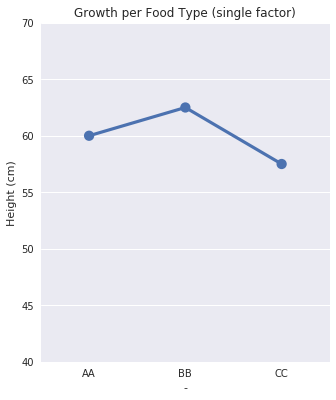

In [47]:
ax = sns.factorplot(data=melt_df, x='variable', y = 'value', size=5.5, aspect=.88)
plt.title('Growth per Food Type (single factor)')
plt.xlabel('-')
plt.ylabel('Height (cm)')
plt.ylim(40,70)
sns.set(rc={'figure.figsize':(11.7,28.27)})
melt_df

,.Type,variable,value
0,1 feeding per day,AA,60.000
1,2 feedings per day,AA,66.875
2,1 feeding per day,BB,62.500
3,2 feedings per day,BB,66.875
4,1 feeding per day,CC,57.500
5,2 feedings per day,CC,40.625


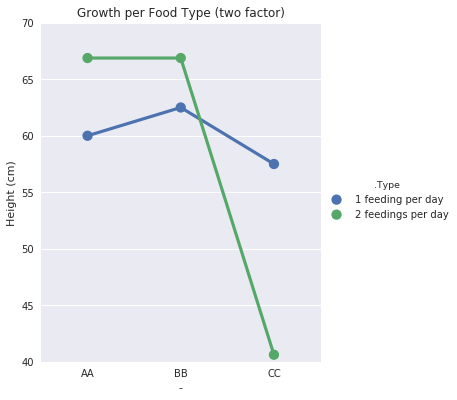

In [74]:
melt_df2 = plant_df_two_means_o.reset_index().melt(id_vars=[('.Type')],value_vars=['AA','BB', 'CC'])
ax = sns.factorplot(data=melt_df2, x='variable', y = 'value', hue = '.Type', size=5.5, aspect=.88)
plt.title('Growth per Food Type (two factor)')
plt.xlabel('-')
plt.ylabel('Height (cm)')
plt.ylim(40,70)
sns.set(rc={'figure.figsize':(11.7,28.27)})
melt_df2

Questions:
1. For AA, how many feedings produce more growth?
More growth with 1 feeding

2. For BB, how many feedings produce more growth?
More growth with 1 feeding

3. For CC, how many feedings produce more growth?
More growth with 2 feeding

4. Do two feedings produce more growth across ALL plant foods consistently?
It does for AA, BB, but not CC. This type of situation is called #### interaction

An interaction occurs when the effect of one factor changes for different levels of the other factor.

In this case, the most effective feeding frequency changes across plant food types?

On a marginal means graph, as a general rule, we look to see if the lines cross or would cross

In [ ]:
nova2 = apstats.Anova(plant_df_two.set_index('.Type'), 2)
nova2.anova_twoway(.05)

In [ ]:
drug_df = pd.DataFrame({'Patients': ['Male']*3 + ['Female']*3, 
                        'Drug1': [8,4,0,14,10,6], 
                        'Drug2': [10,8,6,4,2,0], 
                        'Drug3': [8,6,4,15,12,9]})

In [ ]:
drug_df1 = drug_df.set_index('Patients')

In [ ]:
nova22 = apstats.Anova(drug_df1, 2)
nova22.anova_twoway(.05)